1. Повнозв'язані нейронні мережі

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("milknew.csv") #https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
print(df.shape)
df.head()

(1059, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df["Grade"] = df["Grade"].map({'low': 0, 'medium': 1, 'high': 2})
# scaler = StandardScaler()
# df.loc[:, df.columns != 'Grade'] = scaler.fit_transform(df.loc[:, df.columns != 'Grade'])
df.to_csv('milk.csv', index=False)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [ ]:
# from csv to arrays

data = 'milk.csv'

all_features = []
all_targets = []
with open(data) as d:
    for i, line in enumerate(d):
        if i == 0:
            print('labels:', line.strip())
            continue
        fields = line.strip().split(',')
        all_features.append([float(n) for n in fields[:-1]])
        all_targets.append([int(fields[-1])])
        if i == 1:
          print(f'features: {all_features[0]}\ntarget: {all_targets[0]}')

features = np.array(all_features, dtype='float32')
targets = np.array(all_targets, dtype='uint8')
print('features shape:', features.shape)
print('targets shape:', targets.shape)

labels: pH,Temprature,Taste,Odor,Fat ,Turbidity,Colour,Grade
features: [6.6, 35.0, 1.0, 0.0, 1.0, 0.0, 254.0]
target: [2]
features shape: (1059, 7)
targets shape: (1059, 1)


In [ ]:
# train and test
test_num = int(len(features) * 0.2)
x_train = features[:-test_num]
y_train = targets[:-test_num]
x_test = features[-test_num:]
y_test = targets[-test_num:]

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print('train number:', len(x_train))
print('test number:', len(x_test))

train number: 848
test number: 211


In [ ]:
model =  keras.Sequential()

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/20
22/22 - 5s - loss: 0.5494 - accuracy: 0.4233 - val_loss: 0.4700 - val_accuracy: 0.5882 - 5s/epoch - 236ms/step
Epoch 2/20
22/22 - 0s - loss: 0.1464 - accuracy: 0.5118 - val_loss: 0.1993 - val_accuracy: 0.5765 - 89ms/epoch - 4ms/step
Epoch 3/20
22/22 - 0s - loss: -3.0606e-01 - accuracy: 0.5206 - val_loss: -7.2099e-02 - val_accuracy: 0.5588 - 96ms/epoch - 4ms/step
Epoch 4/20
22/22 - 0s - loss: -6.1519e-01 - accuracy: 0.5664 - val_loss: -3.8103e-01 - val_accuracy: 0.5353 - 90ms/epoch - 4ms/step
Epoch 5/20
22/22 - 0s - loss: -9.0276e-01 - accuracy: 0.5590 - val_loss: -7.2948e-01 - val_accuracy: 0.5824 - 107ms/epoch - 5ms/step
Epoch 6/20
22/22 - 0s - loss: -1.3163e+00 - accuracy: 0.5649 - val_loss: -1.1558e+00 - val_accuracy: 0.5882 - 89ms/epoch - 4ms/step
Epoch 7/20
22/22 - 0s - loss: -1.8814e+00 - accuracy: 0.6047 - val_loss: -1.7401e+00 - val_accuracy: 0.6471 - 88ms/epoch - 4ms/step
Epoch 8/20
22/22 - 0s - loss: -2.2483e+00 - accuracy: 0.6239 - val_loss: -2.3482e+00 - val_accu

In [ ]:
print(model.summary())

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 64)                512       
                                                                 
 batch_normalization_49 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_96 (Dropout)        (None, 64)                0         
                                                                 
 dense_188 (Dense)           (None, 128)               8320      
                                                                 
 batch_normalization_50 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_97 (Dropout)        (None, 128)             

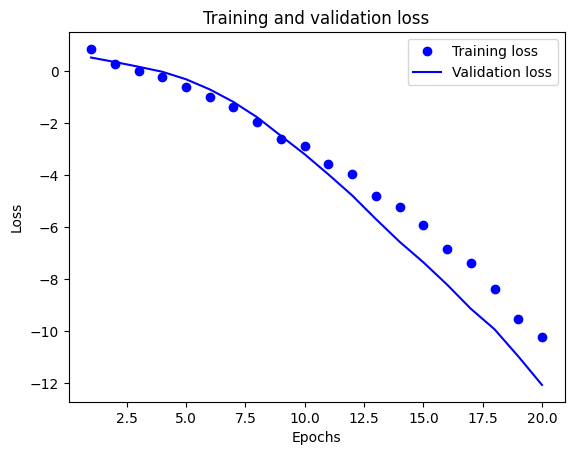

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: -13.485856056213379
Test accuracy: 0.7203791737556458


2. Згорткові нейронні мережі